Same as the other radial simulation, but trying to use 8 neighbors instead of 4. I don't know if this is legit yet.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
sns.set_context('paper', font_scale=2.2)
sns.set_style('ticks')

In [5]:
%load_ext autoreload
%autoreload 2

In [8]:
import rough_front_expansion.cython_D2Q9 as rfe # The only change is importing D2Q9

In [9]:
import skimage as ski
import skimage.morphology

In [24]:
nx = 300 # width
ny = 300 # max height

num_strains = 2

ic_lattice = -1*np.ones((nx, ny), dtype=np.int32)

r, c = ski.draw.circle(nx/2, ny/2, 10)

# Let's inoculate random IC's in each pixel.

ic_lattice[r, c] = np.random.randint(0, 3, size=r.shape[0])

v = np.array([1.0, 1.05, 1.1], dtype=np.float)

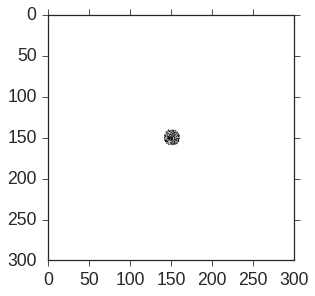

In [25]:
plt.imshow(ic_lattice)

In [26]:
# Testing how it looks

seed = np.random.randint(2**32 - 1)

sim = rfe.Rough_Front(nx=nx, ny=ny, num_strains=3, v=v, ic=ic_lattice, seed=seed, debug=False)

In [27]:
sim.run(sim.max_iterations/4.)

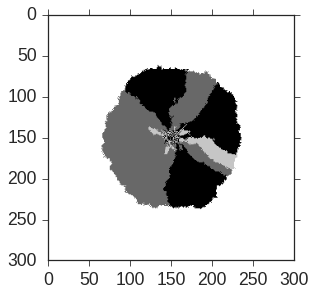

In [28]:
plt.imshow(sim.lattice)

Still looks pretty lattice-artifacty. I put three strains in for fun.

In [29]:
import rough_front_expansion.utility as uti

In [34]:
# This only finds the 0-1 walls now!
wall_df = uti.get_wall_df(sim, 0, 1, expansion_size=1, single_sector=False)

(130.0, 190.0, 120.0, 240.0)

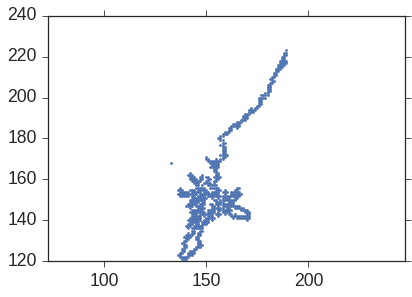

In [35]:
plt.plot(wall_df['r'], wall_df['c'], ls='', marker='.')
plt.axis('equal')